In [1]:
import torch
import torch.nn as nn
import numpy as np
# from AutoODE import LWR_batch_version 
from DNN import Seq2Seq, Seq2Seq_Attn, LWRDataset, LWRDataset_res, train_LWR, eval_LWR, test_LWR, train_hybrid_LWR, eval_hybrid_LWR, test_hybrid_LWR 
from AutoODE import LWR_batch_version, LWR_seq2seq 

In [2]:
# space visualization 

# seq2seq with attention 
trial_1 = torch.load("result/Seq2Seq_Attn/best_space_Seq2Seq_Attn4.pt", map_location=torch.device('cpu'))
trial_2 = torch.load("result/Seq2Seq_Attn/best_space_Seq2Seq_Attn5.pt", map_location=torch.device('cpu'))
trial_3 = torch.load("result/Seq2Seq_Attn/best_space_Seq2Seq_Attn6.pt", map_location=torch.device('cpu')) 

# LWR+seq2seq 
trial_4 = torch.load("result/LWR/new_space_hybridAutoODE1.pt", map_location=torch.device('cpu'))
trial_5 = torch.load("result/LWR/new_space_hybridAutoODE2.pt", map_location=torch.device('cpu'))
trial_6 = torch.load("result/LWR/new_space_hybridAutoODE3.pt", map_location=torch.device('cpu')) 

In [3]:
preds_seq2seq = [torch.tensor(trial_1["preds"]), torch.tensor(trial_2["preds"]), torch.tensor(trial_3["preds"])] 
trues_seq2seq = [torch.tensor(trial_1["trues"]), torch.tensor(trial_2["trues"]), torch.tensor(trial_3["trues"])] 

preds_LWR = [torch.tensor(trial_4["preds"]), torch.tensor(trial_5["preds"]), torch.tensor(trial_6["preds"])] 
trues_LWR = [torch.tensor(trial_4["trues"]), torch.tensor(trial_5["trues"]), torch.tensor(trial_6["trues"])]

In [4]:
test_sensors = torch.tensor([3, 11, 13, 14, 15, 16, 19, 24, 27, 29, 31, 36, 38, 41, 50, 62,
       73, 75, 76]) - 1  
test_sensors 

tensor([ 2, 10, 12, 13, 14, 15, 18, 23, 26, 28, 30, 35, 37, 40, 49, 61, 72, 74,
        75])

In [5]:
trial_1["trues"][-1, 0, :, 11], trial_4["trues"][-1, 0, :, test_sensors][10]

(array([0.01602484, 0.01882728, 0.01739486, 0.01352814, 0.01246293,
        0.0144388 , 0.01526175, 0.01235517, 0.0101179 , 0.01132484,
        0.0103838 , 0.01066763], dtype=float32),
 array([0.01602484, 0.01882728, 0.01739486, 0.01352814, 0.01246293,
        0.0144388 , 0.01526175, 0.01235517, 0.0101179 , 0.01132484,
        0.0103838 , 0.01066763]))

In [6]:
trial_1["trues"][-12, 0, -1, 0], trial_1["trues"][-1, 0, 0, 0], trial_1["trues"][-13, 0, -1, 0], trial_1["trues"][-2, 0, 0, 0]

(0.01246817, 0.01246817, 0.01115437, 0.01115437)

In [7]:
trial_1["trues"][-25, 0, -1, 0], trial_1["trues"][-13, 0, 0, 0]

(0.034189474, 0.038658846)

In [8]:
# sensor location 

xi = [0,  45,  56,  75,  81,  86,  89,  95, 100, 105, 109, 112, 117,
       124, 128, 133, 137, 141, 146, 149, 152, 158, 163, 167, 171, 174,
       180, 186, 192, 197, 200, 205, 207, 210, 211, 213, 214, 228, 231,
       237, 240, 242, 251, 254, 258, 262, 266, 270, 277, 279, 282, 283,
       286, 288, 291, 294, 296, 298, 300, 303, 308, 310, 315, 317, 320,
       322, 327, 338, 342, 345, 352, 356, 359, 362, 366, 368, 374, 379] 

In [9]:
## Plot all timesteps for sensor Nobel Dr from the first test sample 

preds_seq2seq_all = np.stack(preds_seq2seq)
preds_seq2seq_mean = preds_seq2seq_all.mean(axis = 0)

preds_LWR_all = np.stack(preds_LWR)
preds_LWR_mean = preds_LWR_all.mean(axis = 0)
# gt = trues_seq2seq[0][-1] 
# loss = np.array(test_losses).mean()

In [10]:
preds_seq2seq_mean.shape, preds_LWR_mean.shape 

((53256, 3, 12, 20), (53255, 3, 12, 77))

In [14]:
std_1 = preds_seq2seq_all.std(axis = 0)[-1, 0, :, 13]
std_2 = preds_seq2seq_all.std(axis = 0)[-1, 1, :, 13]
std_3 = preds_seq2seq_all.std(axis = 0)[-1, 2, :, 13] 

std_4 = preds_LWR_all.std(axis = 0)[-1, 0, :, test_sensors][12]
std_5 = preds_LWR_all.std(axis = 0)[-1, 1, :, test_sensors][12]
std_6 = preds_LWR_all.std(axis = 0)[-1, 2, :, test_sensors][12] 

In [71]:
preds_seq2seq_all.std(axis = 0).shape, preds_seq2seq_all.std(axis = 0)[-1, 2, :, 13].shape, preds_LWR_all.std(axis = 0)[-1, 0, :, test_sensors][12].shape 

((53256, 3, 12, 20), (12,), (12,))

In [37]:
std_1.shape, result_seq2seq.shape,std_seq2seq.shape, std_LWR.shape 

AttributeError: 'list' object has no attribute 'shape'

In [31]:
std_1, std_2, std_3, std_4, std_5, std_6 = [], [], [], [], [], [] 
result_seq2seq = []
result_LWR = []
trues = [] 
std_seq2seq = preds_seq2seq_all.std(axis = 0) 
std_LWR = preds_LWR_all.std(axis = 0) 
# print(std_seq2seq.shape, std_LWR.shape) 

for i in range(24): 
    print(-12 * (23 - i) - 1)
    index = -12 * (23 - i) - 1
    trues.append(trial_1["trues"][index, :, :, 13])
    result_seq2seq.append(preds_seq2seq_mean[index, :, :, 13])
    result_LWR.append(preds_LWR_mean[index, :, :, test_sensors][12] )
    std_1.append(std_seq2seq[index, 0, :, 13])
    std_2.append(std_seq2seq[index, 1, :, 13])
    std_3.append(std_seq2seq[index, 2, :, 13])
#     print(std_seq2seq[index, 0, :, test_sensors].shape)
    std_4.append(std_LWR[index, 0, :, test_sensors][12])
    std_5.append(std_LWR[index, 1, :, test_sensors][12])
    std_6.append(std_LWR[index, 2, :, test_sensors][12])
#     print(trial_1["trues"][-12 * (23 - i) - 1, :, :, 13].shape)
trues = np.concatenate(trues, axis = 1) 
result_seq2seq = np.concatenate(result_seq2seq, axis = 1) 
result_LWR = np.concatenate(result_LWR, axis = 1) 
std_seq2seq = [np.concatenate(std_1, axis = 0) , np.concatenate(std_2, axis = 0) , np.concatenate(std_3, axis = 0)]  
std_LWR = [np.concatenate(std_4, axis = 0) , np.concatenate(std_5, axis = 0) , np.concatenate(std_6, axis = 0)]  

-277
-265
-253
-241
-229
-217
-205
-193
-181
-169
-157
-145
-133
-121
-109
-97
-85
-73
-61
-49
-37
-25
-13
-1


In [32]:
trues.shape,result_seq2seq.shape, result_LWR.shape, std_1.shape 

AttributeError: 'list' object has no attribute 'shape'

In [16]:
result_seq2seq = preds_seq2seq_mean[-1, :, :, 13]
std_seq2seq = [std_1, std_2, std_3] 

result_LWR = preds_LWR_mean[-1, :, :, test_sensors][12] 
std_LWR = [std_4, std_5, std_6]
true = trues_seq2seq[0][-1, :, :, 13] 

In [33]:
# import modules
from datetime import datetime, timedelta

# Create starting and end datetime object from string
start = datetime.strptime("00:00:00", "%H:%M:%S")
end = datetime.strptime("23:55:00", "%H:%M:%S")

# min_gap
min_gap = 5

# compute datetime interval
arr = [(start + timedelta(hours=min_gap*i/60)).strftime("%H:%M:%S")
       for i in range(int((end-start).total_seconds() / 60.0 / min_gap))]
arr.append('23:55:00')

In [34]:
len(arr), arr 

(288,
 ['00:00:00',
  '00:05:00',
  '00:10:00',
  '00:15:00',
  '00:20:00',
  '00:25:00',
  '00:30:00',
  '00:35:00',
  '00:40:00',
  '00:45:00',
  '00:50:00',
  '00:55:00',
  '01:00:00',
  '01:05:00',
  '01:10:00',
  '01:15:00',
  '01:20:00',
  '01:25:00',
  '01:30:00',
  '01:35:00',
  '01:40:00',
  '01:45:00',
  '01:50:00',
  '01:55:00',
  '02:00:00',
  '02:05:00',
  '02:10:00',
  '02:15:00',
  '02:20:00',
  '02:25:00',
  '02:30:00',
  '02:35:00',
  '02:40:00',
  '02:45:00',
  '02:50:00',
  '02:55:00',
  '03:00:00',
  '03:05:00',
  '03:10:00',
  '03:15:00',
  '03:20:00',
  '03:25:00',
  '03:30:00',
  '03:35:00',
  '03:40:00',
  '03:45:00',
  '03:50:00',
  '03:55:00',
  '04:00:00',
  '04:05:00',
  '04:10:00',
  '04:15:00',
  '04:20:00',
  '04:25:00',
  '04:30:00',
  '04:35:00',
  '04:40:00',
  '04:45:00',
  '04:50:00',
  '04:55:00',
  '05:00:00',
  '05:05:00',
  '05:10:00',
  '05:15:00',
  '05:20:00',
  '05:25:00',
  '05:30:00',
  '05:35:00',
  '05:40:00',
  '05:45:00',
  '05:50:00',


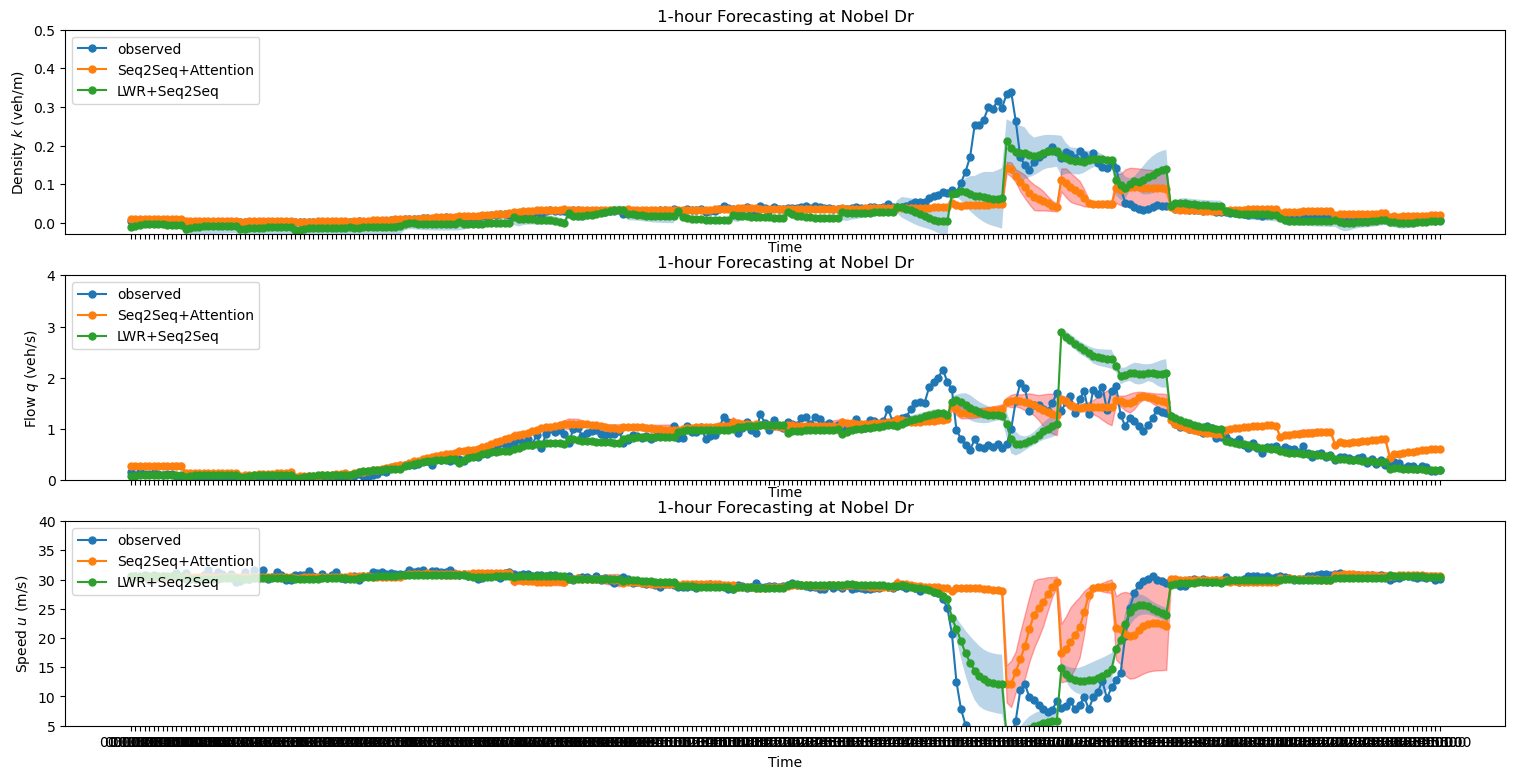

In [40]:
import matplotlib.pyplot as plt

tp=24
plt.style.use('default')
label={0: "Density $k$ (veh/m)",
       1: "Flow $q$ (veh/s)",
       2: "Speed $u$ (m/s)"} 

from matplotlib import gridspec

# fwyp=[xi[n]* 300 / 1.e3 for n in range(len(xi))] ## for all sensors 
# fwyp=list(np.arange(5, 65, 5)) ## for all timesteps 
fwyp = arr 

#gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 
gs_kw={"height_ratios": [3, 3, 3]}

fig4,ax4=plt.subplots(figsize=(16, 8), nrows=3, gridspec_kw=gs_kw, sharex=True)
fig4.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95)
ymin=[-0.03, 0, 5]
ymax=[0.5, 4, 40]


for n in range(3): 
    ax4[n].plot(fwyp, (trues[n, :]), label='observed', marker='o', markersize=5)
    ax4[n].plot(fwyp, (result_seq2seq[n, :]), label='Seq2Seq+Attention', marker='o', markersize=5) 
    ax4[n].plot(fwyp, (result_LWR[n, :]), label='LWR+Seq2Seq', marker='o', markersize=5)
    ax4[n].fill_between(fwyp, (result_seq2seq[n, :] - std_seq2seq[n]), (result_seq2seq[n, :] + std_seq2seq[n]),  color='red', alpha=.3)  
    ax4[n].fill_between(fwyp, (result_LWR[n, :] - std_LWR[n]), (result_LWR[n, :] + std_LWR[n]), alpha=.3)  
    ax4[n].set_ylim(ymin[n], ymax[n])
    #ax4[n].set_xlabel("Distance (grid points)")
    ax4[n].set_ylabel(label[n]) 
    ax4[n].set_xlabel("Time") 
    ax4[n].set_title("1-hour Forecasting at Nobel Dr") 
    ax4[n].legend(loc="upper left")

    #ax4[n].set_xlim(fwyp[0]-1, fwyp[-1]+1)

#     lastpoint=-100
#     if n==0:
#         for p in range(len(xi)):
#             if (fwyp[p] - lastpoint) > 1.:
#                 ax4[n].text(fwyp[p], (y_pred[n, :, tp-68])[p] + 0.02, "none", rotation=90, fontsize=8)
#                 lastpoint=fwyp[p]
# ax4[0].set_title("1-hour Forecasting at Nobel Dr")    
# ax4[2].set_xlabel("5-minute timesteps from 0 to 1 hour") 
#ax4[n].set_ylabel("Traffic density (Veh/m)")
fig4.savefig('space_visualization.jpg', bbox_inches = 'tight', dpi=300)

NameError: name 'true' is not defined

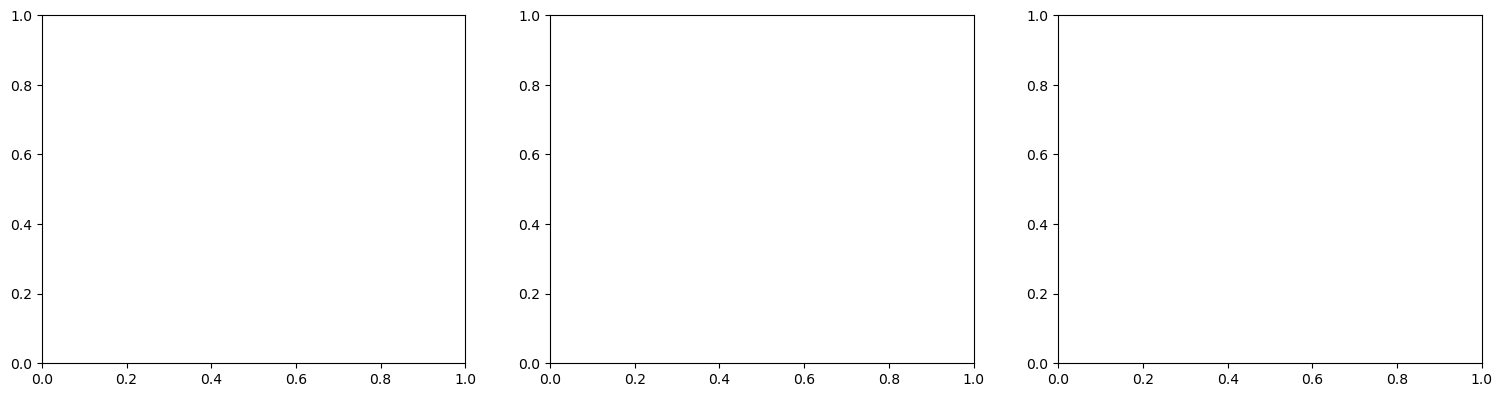

In [37]:
import matplotlib.pyplot as plt

tp=24
plt.style.use('default')
label={0: "Density $k$ (veh/m)",
       1: "Flow $q$ (veh/s)",
       2: "Speed $u$ (m/s)"} 

from matplotlib import gridspec

# fwyp=[xi[n]* 300 / 1.e3 for n in range(len(xi))] ## for all sensors 
fwyp=list(np.arange(5, 65, 5)) ## for all timesteps 

#gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 
# gs_kw={"width_ratios": [3, 3, 3]} gridspec_kw=gs_kw, 

fig4,ax4=plt.subplots(figsize=(16, 4), ncols=3, sharex=True)
fig4.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95)
ymin=[-0.03, 0, 28]
ymax=[0.04, 1, 34]


for n in range(3): 
    ax4[n].plot(fwyp, (true[n, :]), label='observed', marker='o', markersize=5)
    ax4[n].plot(fwyp, (result_seq2seq[n, :]), label='Seq2Seq+Attention', marker='o', markersize=5) 
    ax4[n].plot(fwyp, (result_LWR[n, :]), label='LWR+Seq2Seq', marker='o', markersize=5)
    ax4[n].fill_between(fwyp, (result_seq2seq[n, :] - std_seq2seq[n]), (result_seq2seq[n, :] + std_seq2seq[n]),  color='red', alpha=.3)  
    ax4[n].fill_between(fwyp, (result_LWR[n, :] - std_LWR[n]), (result_LWR[n, :] + std_LWR[n]),  alpha=.3)  
    ax4[n].set_ylim(ymin[n], ymax[n])
    #ax4[n].set_xlabel("Distance (grid points)")
    ax4[n].set_ylabel(label[n]) 
    ax4[n].set_xlabel("Time") 
    ax4[n].set_title("1-hour Forecasting at Nobel Dr") 
    ax4[n].legend(loc="upper left")

    #ax4[n].set_xlim(fwyp[0]-1, fwyp[-1]+1)

#     lastpoint=-100
#     if n==0:
#         for p in range(len(xi)):
#             if (fwyp[p] - lastpoint) > 1.:
#                 ax4[n].text(fwyp[p], (y_pred[n, :, tp-68])[p] + 0.02, "none", rotation=90, fontsize=8)
#                 lastpoint=fwyp[p]
# ax4[0].set_title("1-hour Forecasting at Nobel Dr")    
# ax4[2].set_xlabel("5-minute timesteps from 0 to 1 hour") 
#ax4[n].set_ylabel("Traffic density (Veh/m)")
fig4.savefig('space_visualization.jpg', bbox_inches = 'tight', dpi=300)

In [ ]:
import matplotlib.pyplot as plt

tp=24
plt.style.use('default')
label={0: "Density $k$ (veh/m)",
       1: "Flow $q$ (veh/s)",
       2: "Speed $u$ (m/s)"} 

from matplotlib import gridspec

fwyp=[xi[n]* 300 / 1.e3 for n in range(len(xi))]

#gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 
gs_kw={"height_ratios": [3, 3, 3]}

fig4,ax4=plt.subplots(figsize=(5, 15), nrows=3, gridspec_kw=gs_kw, sharex=True)
fig4.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95)
ymin=[-0.01, -0.1, 20]
ymax=[0.06, 1.5, 40]


for n in range(3): 
    ax4[n].plot(fwyp, (true[n, :]), label='observed', marker='o', markersize=5)
    ax4[n].plot(fwyp, (result[n, :]), label='predicted', marker='o', markersize=5)
    ax4[n].fill_between(fwyp, (result[n, :] - std[n]), (result[n, :] + std[n]),  color='red', alpha=.3)    
    ax4[n].set_ylim(ymin[n], ymax[n])
    #ax4[n].set_xlabel("Distance (grid points)")
    ax4[n].set_ylabel(label[n])

    #ax4[n].set_xlim(fwyp[0]-1, fwyp[-1]+1)

#     lastpoint=-100
#     if n==0:
#         for p in range(len(xi)):
#             if (fwyp[p] - lastpoint) > 1.:
#                 ax4[n].text(fwyp[p], (y_pred[n, :, tp-68])[p] + 0.02, "none", rotation=90, fontsize=8)
#                 lastpoint=fwyp[p]
ax4[0].set_title("FC: last timestep from the last test sample")    
ax4[2].set_xlabel("Relative distance from North to South (km)")
#ax4[n].set_ylabel("Traffic density (Veh/m)")
fig4.savefig('FC.jpg', dpi=300)